### INITIAL DATA EXTRACTION AND EXPLORATION

In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("german_credit_data.csv")

In [5]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [7]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [9]:
df=df.drop(columns=["Unnamed: 0"])

In [11]:
df.columns=["age", "sex", "income_sources", "housing", "savings_account", "chequing_account", "credit_amount", "duration", "purpose", "risk"]

In [13]:
df.head()

,age,sex,income_sources,housing,savings_account,chequing_account,credit_amount,duration,purpose,risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [15]:
df.isnull().sum()

age                   0
sex                   0
income_sources        0
housing               0
savings_account     183
chequing_account    394
credit_amount         0
duration              0
purpose               0
risk                  0
dtype: int64

In [17]:
df["savings_account"]=df["savings_account"].fillna("unknown")
df["chequing_account"]=df["chequing_account"].fillna("unknown")

In [19]:
df.describe()

,age,income_sources,credit_amount,duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

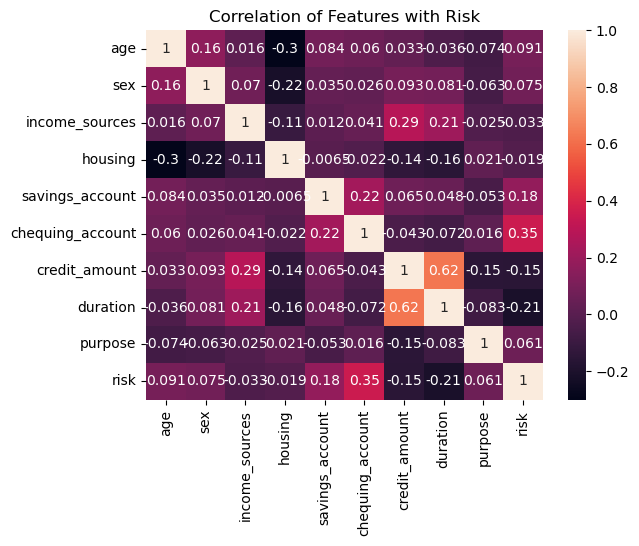

In [23]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
X = df
X["sex"]=LE.fit_transform(df["sex"])
X["housing"]=LE.fit_transform(df["housing"])
X["savings_account"]=LE.fit_transform(df["savings_account"])
X["chequing_account"]=LE.fit_transform(df["chequing_account"])
X["purpose"]=LE.fit_transform(df["purpose"])
X["risk"]=LE.fit_transform(df["risk"])

data = X[['age', 'sex', 'income_sources', 'housing', 'savings_account',
       'chequing_account', 'credit_amount', 'duration', 'purpose', 'risk']].corr()

# Plot heatmap
sns.heatmap(data, annot=True, color="red")
plt.title("Correlation of Features with Risk")
plt.show()


<Axes: xlabel='age', ylabel='credit_amount'>

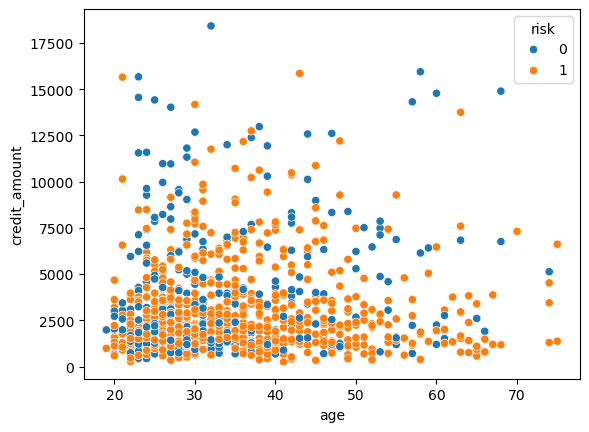

In [25]:
sns.scatterplot(data=df, x=df["age"], y=df["credit_amount"], hue=df["risk"])

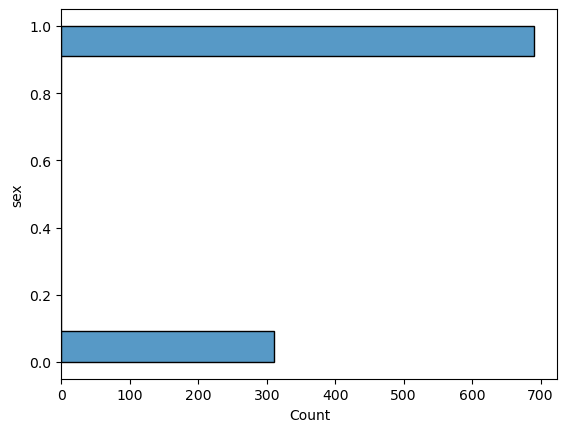

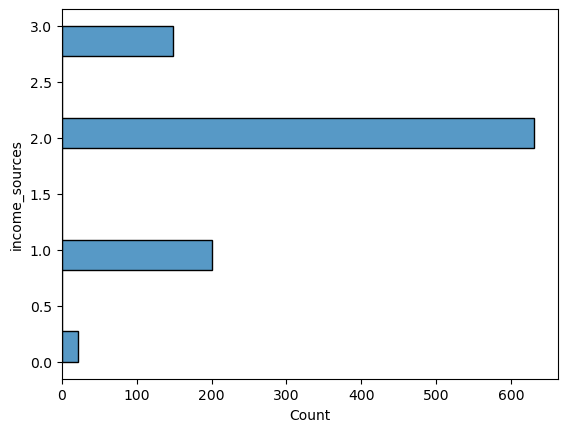

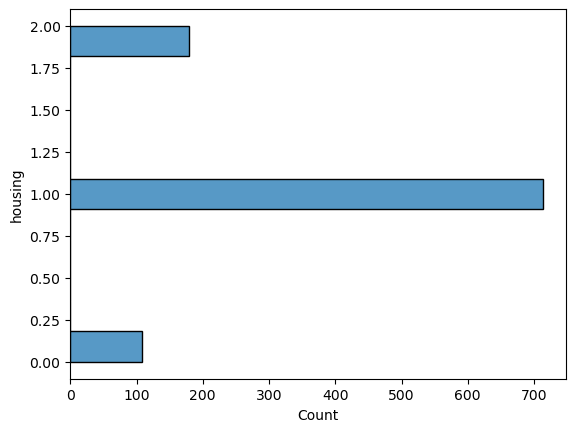

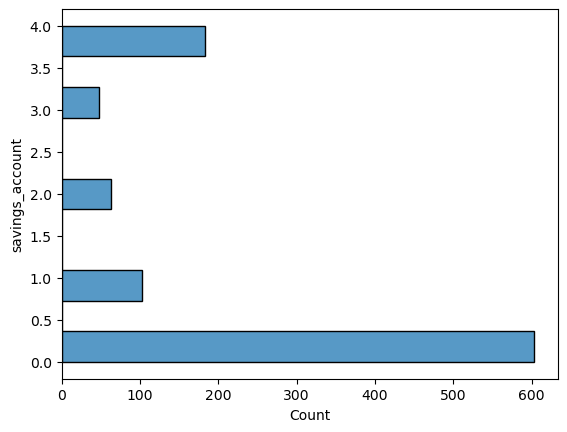

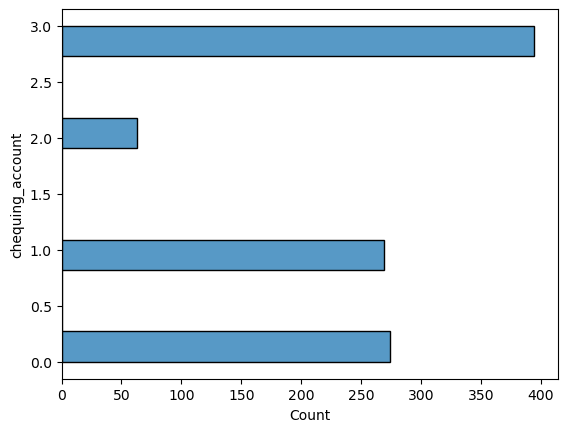

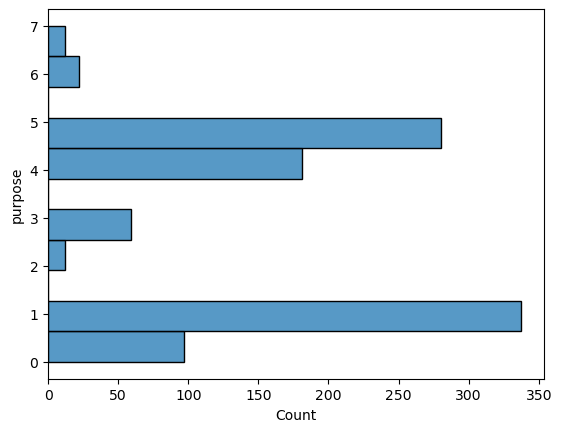

In [27]:
df.columns
categorical_columns = ['sex', 'income_sources', 'housing', 'savings_account','chequing_account', 'purpose']

for i in categorical_columns:
    sns.histplot(data=df, y=df[i])
    plt.show()

### DATA SCIENCE PART

In [30]:
X.columns

Index(['age', 'sex', 'income_sources', 'housing', 'savings_account',
       'chequing_account', 'credit_amount', 'duration', 'purpose', 'risk'],
      dtype='object')

In [32]:
y = X["risk"]
X = X.drop(columns=["risk"])

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [38]:
def train_model(model, param_grid, X_train ,X_test, y_train, y_test):
    grid = GridSearchCV(model, param_grid, cv=10, scoring = "accuracy", n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return best_model, acc, grid.best_params_

In [40]:
DT = DecisionTreeClassifier(random_state=1)
DT_param_grid = {
    "max_depth" : [3, 5, 7,10], 
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]}

In [42]:
best_dt, acc_dt, params_dt = train_model(DT, DT_param_grid, X_train, X_test, y_train, y_test)
print(best_dt, acc_dt, params_dt)

DecisionTreeClassifier(max_depth=7, random_state=1) 0.725 {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [43]:
RF = RandomForestClassifier(random_state=1)
RF_param_grid = {
    "n_estimators":[50,100,200],
    "max_depth":[5,7,10]
}

In [44]:
best_rf, acc_dt, params_dt = train_model(RF, RF_param_grid, X_train, X_test, y_train, y_test)
print(best_rf, acc_dt, params_dt)

RandomForestClassifier(max_depth=7, random_state=1) 0.77 {'max_depth': 7, 'n_estimators': 100}


In [48]:
XG = XGBClassifier(random_state=1)
XG_param_grid = {
    "n_estimators":[50,100,200],
    "max_depth":[5,7,10]
}

In [50]:
best_xg, acc_dt, params_dt = train_model(XG, XG_param_grid, X_train, X_test, y_train, y_test)
print(best_xg, acc_dt, params_dt)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...) 0.725 {'max_depth': 7, 'n_estimators': 100}


### EXPORTING MODEL

In [53]:
import pickle

In [55]:
with open("Random_forest_model", "wb") as f:
    pickle.dump(best_rf, f)
    print("Model Saved")

Model Saved


In [57]:
df.columns

Index(['age', 'sex', 'income_sources', 'housing', 'savings_account',
       'chequing_account', 'credit_amount', 'duration', 'purpose', 'risk'],
      dtype='object')

In [59]:
best_rf.predict([[27,1,2,1,2,2,25000,12,1]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [61]:
df.head()

,age,sex,income_sources,housing,savings_account,chequing_account,credit_amount,duration,purpose,risk
0,67,1,2,1,4,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,3,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0


## TESTING THE MODEL

In [118]:
print("RISK PREDICTOR")
print("Please fill out client information")

age = input("Please enter clients age -> (18-80)")
while age.isdigit() == False:
    age=input("Please enter number value only")
    
    
sex = input("Please enter clients gender. Enter 0 -> Female, 1 -> Male")

income_sources = input("please enter number of income sources of the client ->")
while income_sources.isdigit() == False:
    income_sources = input("Please enter numeric value only")

housing = input("Please enter 0 -> Not owned and not on rent, 1 -> Own, 2 -> rent")


savings_account = int(input("please enter amount in clients savings account"))



chequing_account = int(input("please enter amount in clients chequing account"))



credit_amount = input("please enter requested credit amount")
while credit_amount.isdigit() == False:
    credit_amount = input("Please enter a valid number")


duration = input("please enter duration for the credit term")
while duration.isdigit() == False:
    duration = input("Please enter a valid number")


print("Please enter purpose for the credit from the following options")
print("")
print("Press 0 for option 0 -> Business loan")
print("Press 1 for option 1 -> Car loan")
print("Press 2 for option 2 -> purchasing domestic appliances")
print("Press 3 for option 3 -> educational loan")
print("Press 4 for option 4 -> purchasing Furniture or Equipments")
print("Press 5 for option 5 -> purchasing Radio or TV")
print("Press 6 for option 6 -> Loan for home repairs")
print("Press 7 for option 7 -> Loan for Vacation / miscellaneous")

purpose = input("Please enter from option -> 0 - 7")
param = [age, sex, income_sources, housing, savings_account, chequing_account, credit_amount, duration, purpose]
print(param)

RISK PREDICTOR
Please fill out client information


Please enter clients age -> (18-80) 28
Please enter clients gender. Enter 0 -> Female, 1 -> Male 1
please enter number of income sources of the client -> 1
Please enter 0 -> Not owned and not on rent, 1 -> Own, 2 -> rent 2
please enter amount in clients savings account 90000
please enter amount in clients chequing account 5000
please enter requested credit amount 200000
please enter duration for the credit term 120


Please enter purpose for the credit from the following options

Press 0 for option 0 -> Business loan
Press 1 for option 1 -> Car loan
Press 2 for option 2 -> purchasing domestic appliances
Press 3 for option 3 -> educational loan
Press 4 for option 4 -> purchasing Furniture or Equipments
Press 5 for option 5 -> purchasing Radio or TV
Press 6 for option 6 -> Loan for home repairs
Press 7 for option 7 -> Loan for Vacation / miscellaneous


Please enter from option -> 0 - 7 0


['28', '1', '1', '2', 90000, 5000, '200000', '120', '0']


In [124]:
prediction=best_rf.predict([param])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [126]:
if prediction == 1:
    print("Good")
else:
    print("Bad")

Bad
